#  Project details

The dataset used for this project was sourced on Kaggle. According to the Kaggle page, this dataset was created for the purpose of analysing customer purchases to gain better understanding of consumer habits and behaviour.

Direct link for dataset: https://www.kaggle.com/datasets/datascientistanna/customers-dataset.

For this project, I decided to analyse consumer data to provide recommendations/solutions to improve/increase spending amounts and customer loyalty to the company. 

In [2]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
#Upload dataset
df = pd.read_csv('Customers.csv')

In [4]:
#Descriptive statistics
print(df.describe())

        CustomerID          Age  Annual_income  Spending_score  \
count  2000.000000  2000.000000    2000.000000     2000.000000   
mean   1000.500000    48.960000  110731.821500       50.962500   
std     577.494589    28.429747   45739.536688       27.934661   
min       1.000000     0.000000       0.000000        0.000000   
25%     500.750000    25.000000   74572.000000       28.000000   
50%    1000.500000    48.000000  110045.000000       50.000000   
75%    1500.250000    73.000000  149092.750000       75.000000   
max    2000.000000    99.000000  189974.000000      100.000000   

       Work_experience  Family_size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000  


* This is a decent sized dataset, allowing for significant analysis.
* There may be some errors in the data, or information that customers chose to answer incorrectly etc. For example, the age variable shows a minimum value of 0, when reviewing this in the dataset, the individual is said to be working within the artist profession with an annual income of 22,000 and a spending score of 92.
  

In [5]:
#Removal na
df = df.dropna()

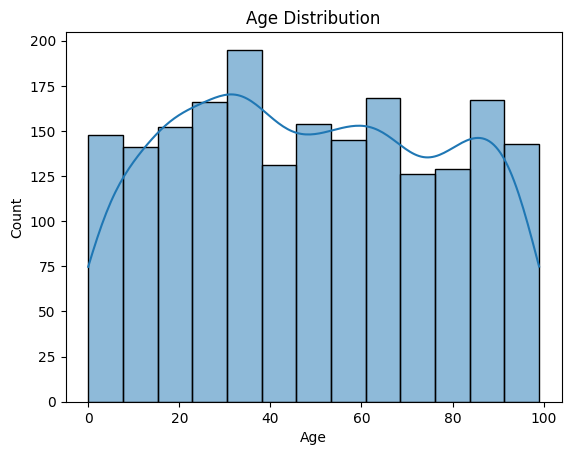

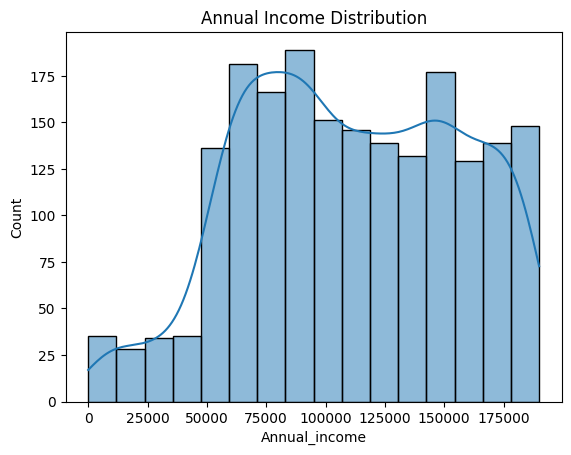

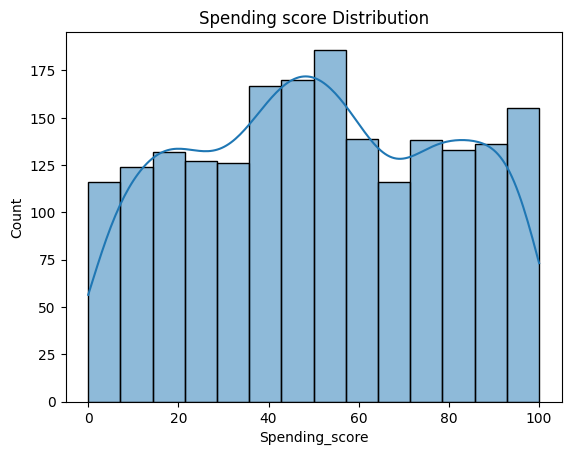

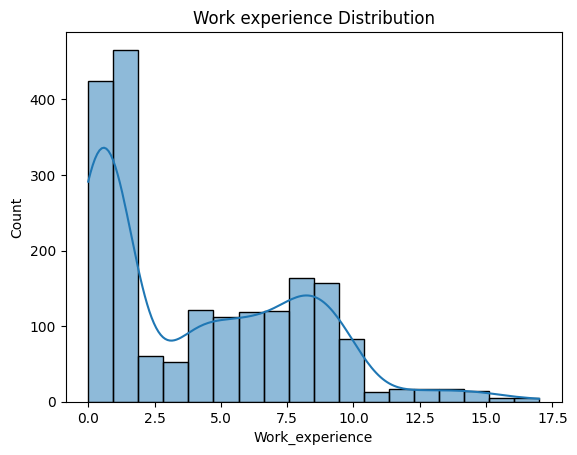

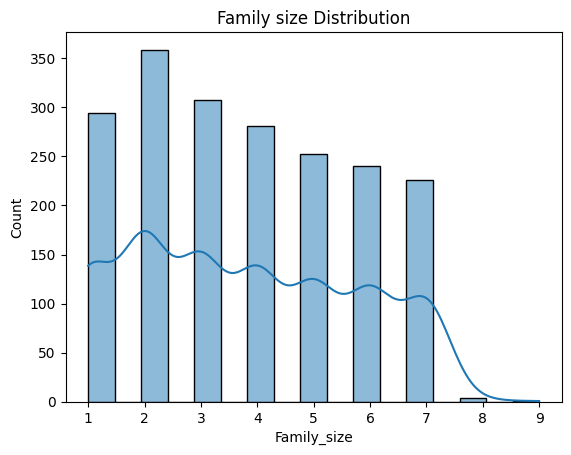

In [6]:
#Reviewing the different variables in the data
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual_income'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending_score'], kde=True)
plt.title('Spending score Distribution')
plt.show()

sns.histplot(df['Work_experience'], kde=True)
plt.title('Work experience Distribution')
plt.show()

sns.histplot(df['Family_size'], kde=True)
plt.title('Family size Distribution')
plt.show()

## Review of graphs generated

*Note graphs were made for variables with numerical values*

* The age distribution graph displays a diverse range in age groups that shop with this company.
* The most common family size seen is 2.

## Alternative plot for numerical data

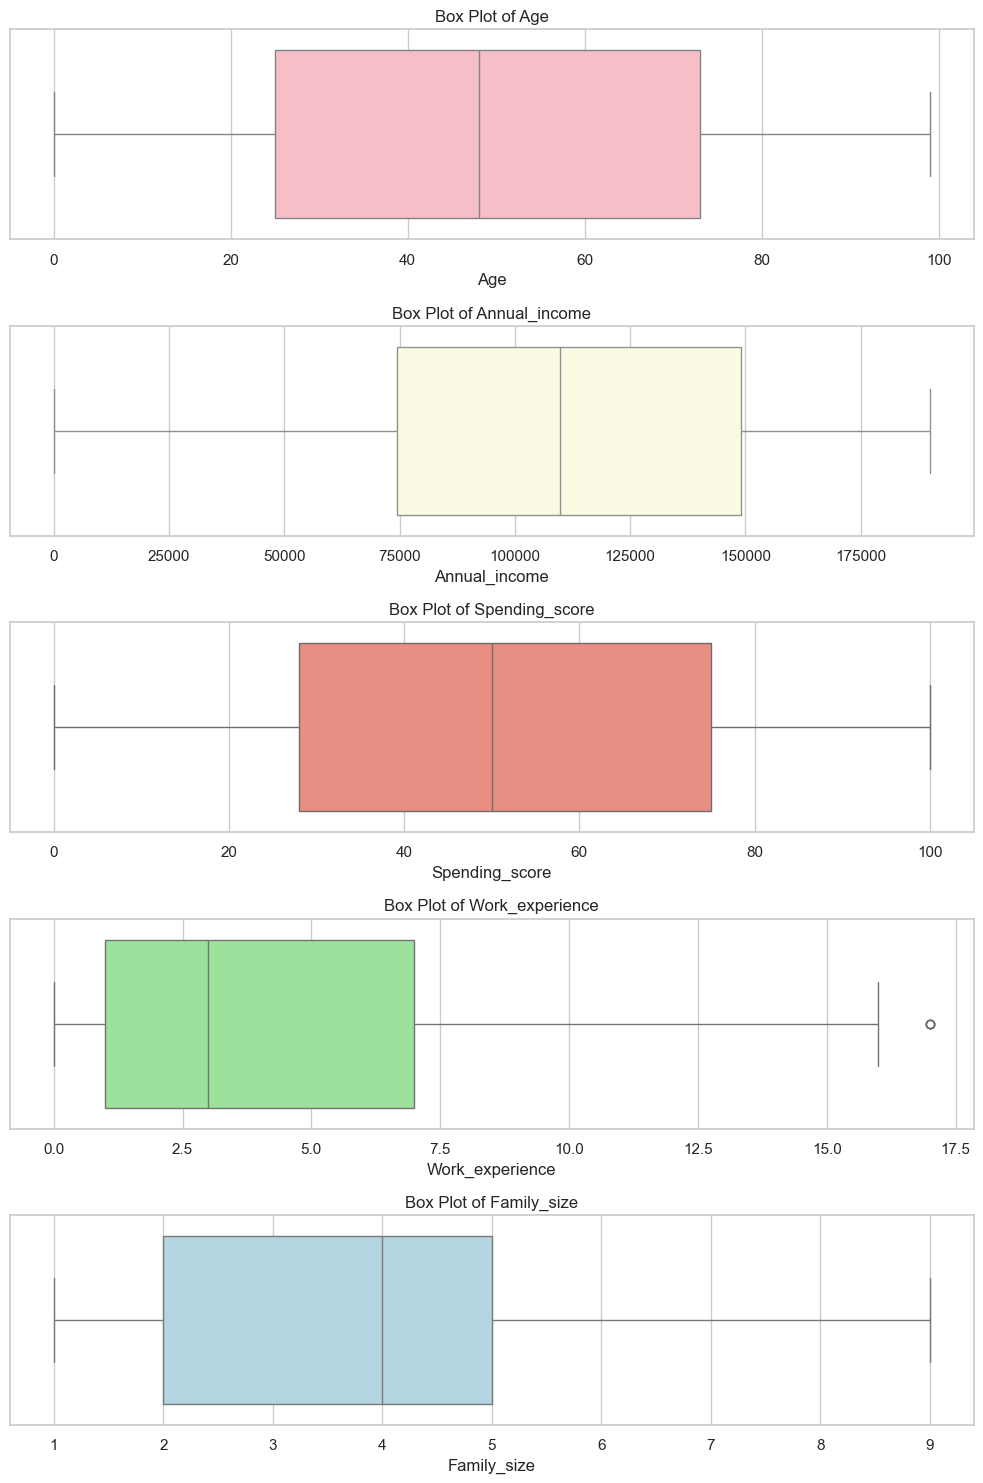

In [7]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

variables = ['Age', 'Annual_income', 'Spending_score', 'Work_experience', 'Family_size']

colors = ['lightpink', 'lightyellow', 'salmon', 'lightgreen', 'lightblue']


for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axes[i], color=colors[i])  
    axes[i].set_title(f'Box Plot of {var}', fontsize=12)  

plt.tight_layout()

plt.show()

## **Qualitiative features**

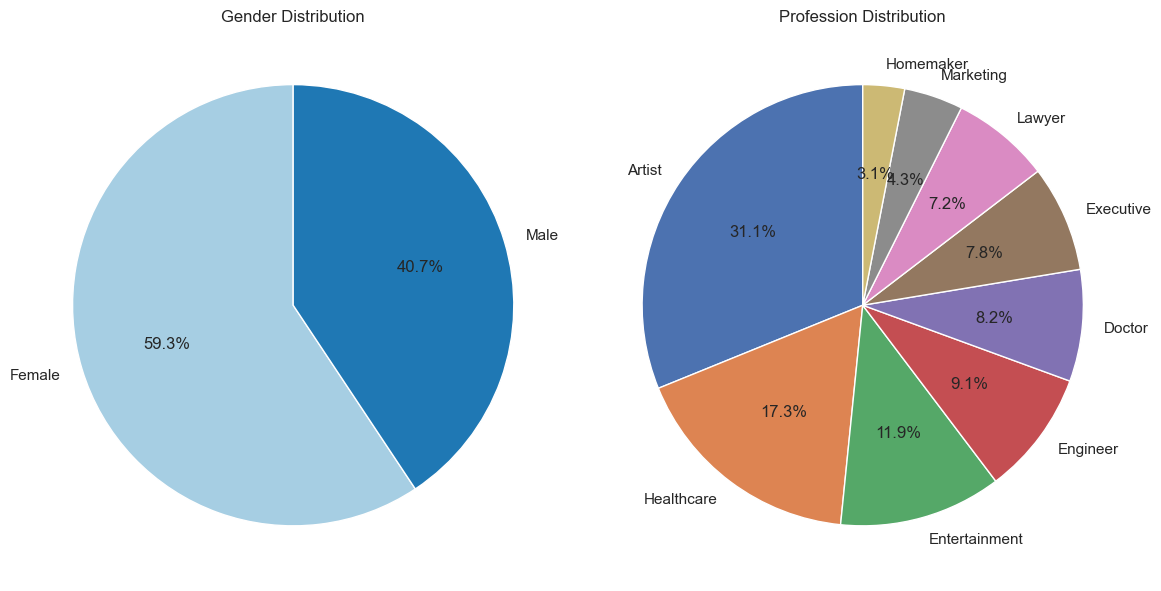

In [8]:
gender_counts = df['Gender'].value_counts()

profession_counts = df['Profession'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#a6cee3', '#1f78b4'], startangle=90)
ax1.set_title('Gender Distribution')

ax2.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Profession Distribution')

plt.tight_layout()
plt.show()

* The dataset set is majority female.
* The professions with the highest frequencies are Artist **(31.1%)**, Healthcare **(17.3%)**, and Entertainment **(11.9%)**. This highlights a majority focus on the healthcare and creative industry. This may indicate that the products provided by the company greatly appeal to these sectors, particuarly the artist industry.
* The profession with the least amount of individuals is Homemaker.

## What variables might influence spending habits?

**Gender vs Profession**

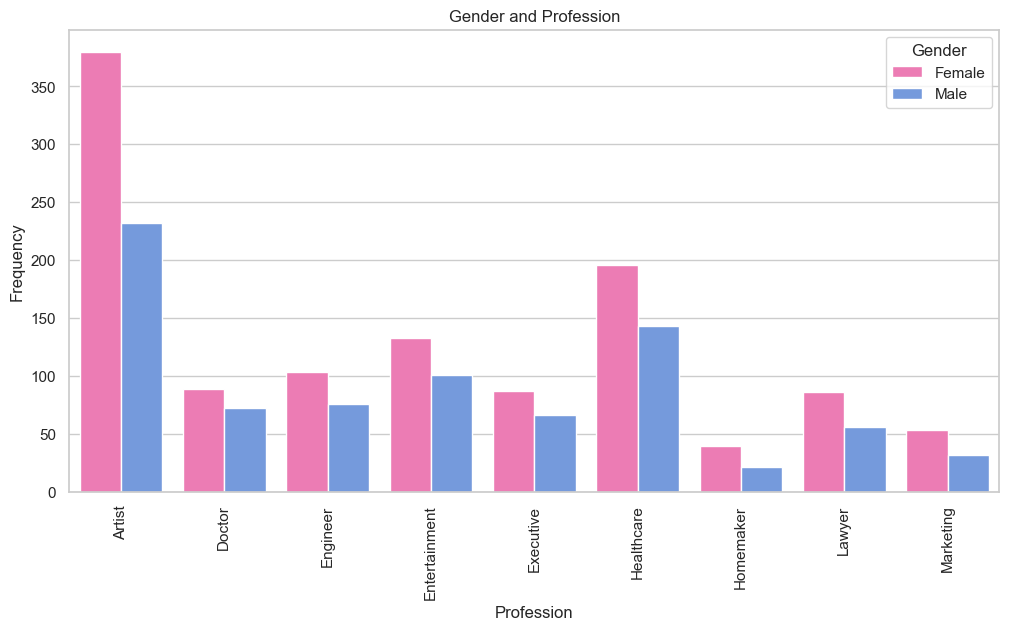

In [9]:
#Insight towards gender vs each profession.
data= df.groupby(["Gender", "Profession"]).size().reset_index(name="Frequency")

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Profession", y="Frequency", hue="Gender", palette=["#FF69B4", "#6495ED"])
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Frequency")
plt.title("Gender and Profession")
plt.show()

* Considering Artist is the most common profession within this dataset, it is expected to be the highest frequency in profession for both Male and Females. In terms of recommendations for this company, tailoring products that are centred around the artist industry may drive more sells, as it seems there current product line is appealing strongly to this sector.


**Profession vs Annual income**

Text(0.5, 1.0, ' profession & Annual income')

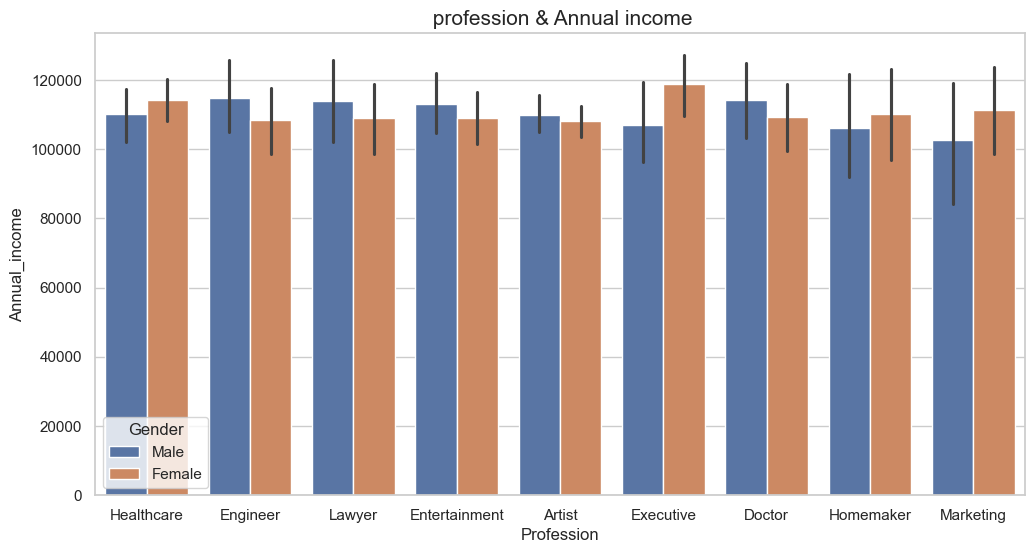

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x= "Profession", y= "Annual_income", hue="Gender")
plt.title(" profession & Annual income", fontsize= 15)

**Analysis**

The income range is generally all above 100,000, however it is clear that the annual income for males generally is greater than females. For example, Males have higher income in the following professions: Engineer, Lawyer, Entertainment, Artist, and Doctor. Although it is important to note, that the difference in income is not as large in comparison to the industries where Females generally make higher. For example, Females make higher in the Executive profession, the difference between the average income for males to females is around 10,000.



### Correlation analysis

*Note this was conducted on the numerical variables.

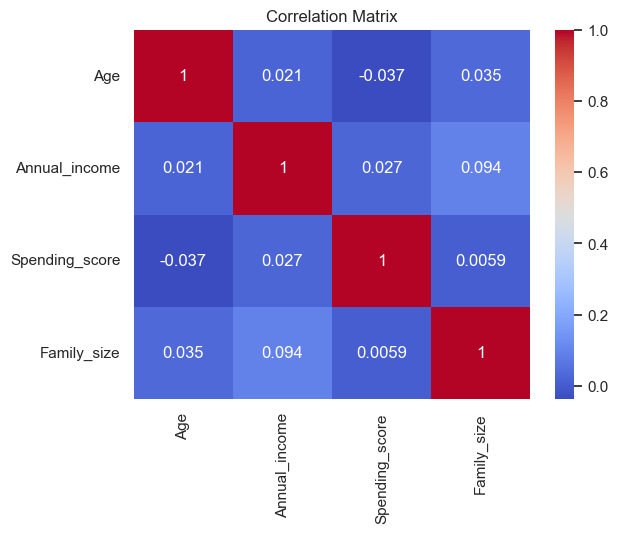

In [11]:
# Correlation Analysis: To review whether certain variables influence others.
correlation_matrix = df[['Age', 'Annual_income', 'Spending_score', 'Family_size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## **Review of correlation matrix:**


*  There is generally no strong correlation between the variables.
*  The highest correlation can be seen for the variables Annual Income vs Family size, although this is not a significant correlation.

It seems that there is no significant relationship between the variables. The typical aspects such as annual income do not neccessarily influence the spending score/habits. As such, in this case, it would be better for the company to focus primarily where majority of there customers are, for example, majority of the customers being in the artist profession. If the company wanted to take an alternative route, it is apparent that there current methods are working in appealing to the creative industry, to divert into other industries it would be best to make products that are suited to them.

Due to the lack of relationship between the variables, I decided not to do linear regression.

In my previous dataset, all the variables/features display a high correlation with one another. With this type of dataset, this can affect the ability to identify any individual effects for each variable. Moreover, this may impact additional statistical analysis. To address that I implemented principal component analysis(PCA). With my previous dataset, I believe the issue was primarily due to the small dataset size, there was also 200 customers used.



## Diving deeper

In this section, I will be focusing on the top professions for further analysis [Artist, Healthcare, and Entertainment]

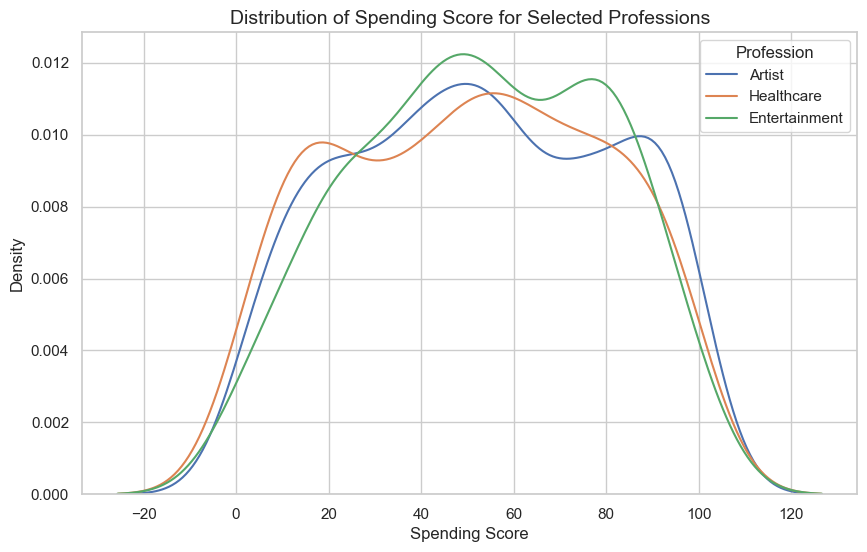

In [12]:
# distribution of spending scores of both Artists && Homemakers

# Step 1: Filter the DataFrame for the three professions you are interested in
professions_to_compare = ['Artist', 'Healthcare', 'Entertainment']  # Replace with actual profession names
filtered_df = df[df['Profession'].isin(professions_to_compare)]

# Step 2: Create the distribution plot using Seaborn's kdeplot
plt.figure(figsize=(10, 6))  # Adjust figure size as necessary

# Plot KDE for each profession
for profession in professions_to_compare:
    sns.kdeplot(filtered_df[filtered_df['Profession'] == profession]['Spending_score'], label=profession)

# Step 3: Customize the plot
plt.title('Distribution of Spending Score for Selected Professions', fontsize=14)
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Profession')
plt.grid(True)

# Show the plot
plt.show()

## Review
* The artist industry and the healthcare industry have a broad range in terms of spending score.
  
* Those in the entertainment industry generally have a higher spending score in comparison to the healthcare and artist profession, this may indicate an appeal for premium services/products for this audience.



# Overall conclusion and recommendations

*Recommendations and solutions have been suggested throughout the notebook.* 

As previously stated, it seems the products that the company provides greatly appeals to the creative industry, particuarly for artists. As such, they can create marketing strategies to further appeal to this industry. Additionally, create or introduce additional products that are tailored to them. To provide better insight towards this, the company could conduct surveys with their clients to gather more insights towards what they desire, and implement them by bettering current products or introducing newer products.

If the company for example wanted to focus more on another profession, such as Healthcare. This would be a good choice, considering the analysis displayed that those within the healthcare industry have a consistent purchase spending score. They could implement similar strategies [e.g., loyalty programs] that i have detailed above, to gain further insight towards what the consumer desires. Moreover, they can review competitors, and their standing within the industry.

Currently, the company standing displays a greater appeal to females, whilst the difference is not huge. This can be also be used to influence/improve marketing strategies. It can be assumed that current strategies are working in attracting females customers, however may be less appealing to males. 

# Final review:

*Note that I have included how i went about the analysis throughout this notebook*

**All labs were completed, though not attach. With the information/tasks in the labs as well as additional resources online, I completed the analysis of this dataset.**

Difficulties faced:

* I had some difficulties finding a suitable dataset to conduct my analysis. I had an initial dataset that I was working with, however when analysing the data- the final reports indicated that the size of the sample was greatly affecting the ability to find any cause in relationships, and therefore prevented the ability to draw conclusions and recommendation that could contribute to better sales/revenue for the company. To deal with this, I did use alternative techniques like PCA, but ultimately decided to use another dataset. The previous dataset has 200 records, whilst this one has 2000.

Changes:

* In terms of what i would have done differently, I would likely have used a dataset with additional features that may have provided more insights towards correlation as well as allowed for the generation of better solutions and recommendations that could be tailored to individuals to provide a personalised experience. For example, there may be a feature that influences Male spending habits, by focusing recommendations on that, it would likely contribute to an increase in sales.

* Use a larger dataset, generally in a real world scenario, a client ideally has a larger data frame to analyse and review. In most cases, having a larger dataset can create better solutions that can produce the results intended for the company.

